# Temporal b value pada data katalog

Jalankan file ini di Openquake yang sudah diinstal di komputer masing-masing.

atau:

Jalankan file ini di jupyter dengan cara mengubah kernel ke `openquake`. Jika kernel `openquake` belum ada, lakukan langkah-langkah berikut ini:

Openquake dapat diunduh di sini:
https://downloads.openquake.org/pkgs/windows/oq-engine/OpenQuake_Engine_3.11.5-1.exe

Install beberapa tambahan packages di openquake:

(Asumsi lokasi instalasi openquake di sini: `C:\Program Files\Openquake Engine\python3.6\`, 
jika tidak maka ubah lokasi tersebut sesuai dengan komputer masing-masing)

1. Buka Command Prompt
2. Install `jupyter`: `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m pip install jupyter`
3. Daftarkan ke dalam kernel (opsional): `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m ipykernel install --name "openquake" --display-name "openquake"`


Untuk uji coba, jalankan salah satu baris di bawah ini:

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter.exe" notebook`

atau

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter-notebook.exe"`

## 1. Import packages

Hal ini memastikan apakah python yang digunakan sudah menyediakan packages yang dibutuhkan.

In [1]:
from custom_openquake import *

# folder penyimpanan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)

## 2. Baca data katalog

In [25]:
catalogue = catalogue_from_pkl('dict_catalogue_fault_Enggano.pkl')

**atau**

In [8]:
catalogue = catalogue_from_csv('catalogue_declustered_1.csv')

## 3. Menghitung ...

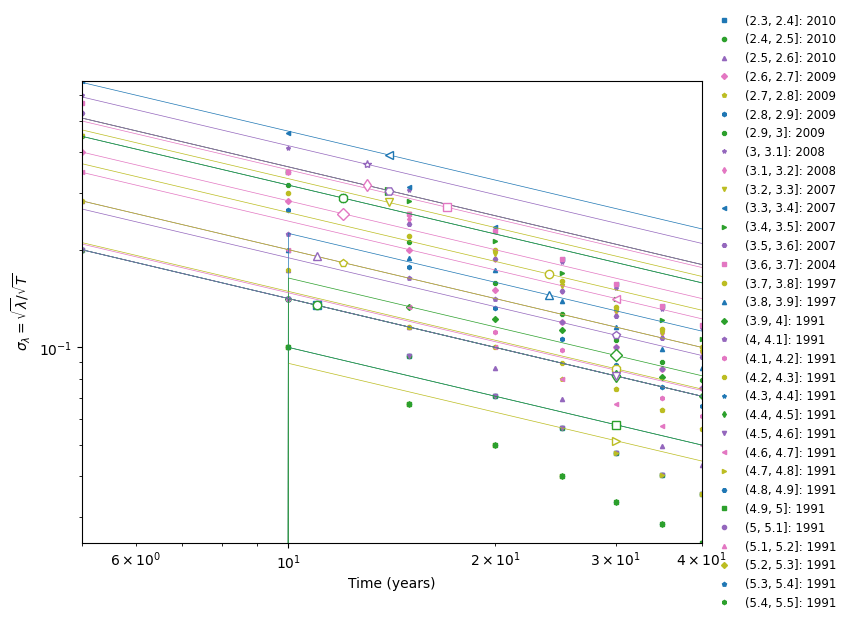

In [5]:
from openquake.hmtk.plotting.seismicity.completeness.plot_stepp_1972 import create_stepp_plot

comp_config = {'magnitude_bin': 0.1,
                'time_bin': 5. ,
                'increment_lock': True }

completeness_algorithm = Stepp1971()
completeness_table = completeness_algorithm.completeness(catalogue, comp_config)
create_stepp_plot(completeness_algorithm)

-+- ctime 2016.0  m_c 3.2
bval:  0.5973165357037256 sigma_b:  0.012880970070861667 neqi:  1409 aval:  4.282172656977635 sigma_a:  0.0412191042267569
-+- ctime 2016.0  m_c 3.2
bval:  0.5974421444171716 sigma_b:  0.012772040912048694 neqi:  1443 aval:  4.2929299428448 sigma_a:  0.04087053091855619
-+- ctime 2016.0  m_c 3.2
bval:  0.5949576259302971 sigma_b:  0.012720130202770068 neqi:  1452 aval:  4.287679768957382 sigma_a:  0.040704416648864594
-+- ctime 2016.0  m_c 3.2
bval:  0.5974943980704204 sigma_b:  0.012845518670117195 neqi:  1452 aval:  4.295797439805776 sigma_a:  0.04110565974437552
-+- ctime 2016.0  m_c 3.2
bval:  0.6015502605257093 sigma_b:  0.012814786793311711 neqi:  1455 aval:  4.309672576620552 sigma_a:  0.04100731773859767
-+- ctime 2016.0  m_c 3.2
bval:  0.6050733469792244 sigma_b:  0.01283985294967119 neqi:  1470 aval:  4.325400794698051 sigma_a:  0.04108752943894789
-+- ctime 2016.0  m_c 3.2
bval:  0.6110280069186588 sigma_b:  0.01298996650262161 neqi:  1473 aval:  4.

-+- ctime 2020.0  m_c 3.2
bval:  0.6815889253209981 sigma_b:  0.04144907100049568 neqi:  234 aval:  4.249270422773356 sigma_a:  0.13263702720158577
-+- ctime 2020.0  m_c 3.2
bval:  0.6810320177434633 sigma_b:  0.04578230665429653 neqi:  187 aval:  4.1501140676516 sigma_a:  0.1465033812937495
-+- ctime 2020.0  m_c 3.2
bval:  0.6877657762704866 sigma_b:  0.05299792058960848 neqi:  151 aval:  4.078797435694746 sigma_a:  0.16959334588674668
-+- ctime 2020.0  m_c 3.2
bval:  0.6681453567742329 sigma_b:  0.05724737927247455 neqi:  112 aval:  3.886253168683746 sigma_a:  0.1831916136719185
-+- ctime 2020.0  m_c 3.2
bval:  0.7053058326793631 sigma_b:  0.0755149054299233 neqi:  73 aval:  3.8192715290304364 sigma_a:  0.2416476973757553


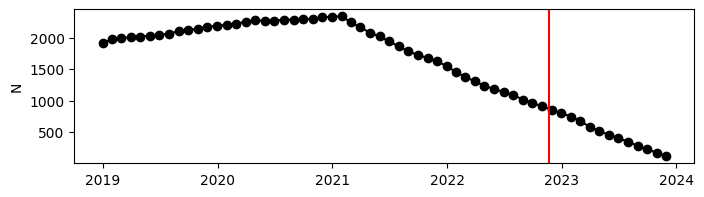

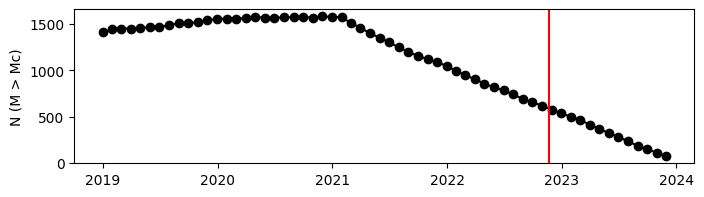

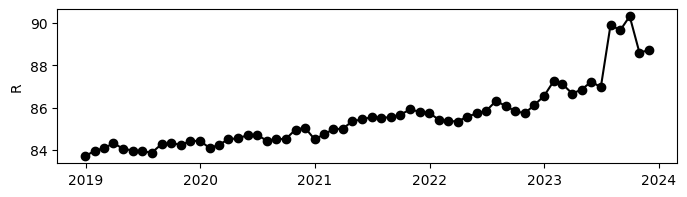

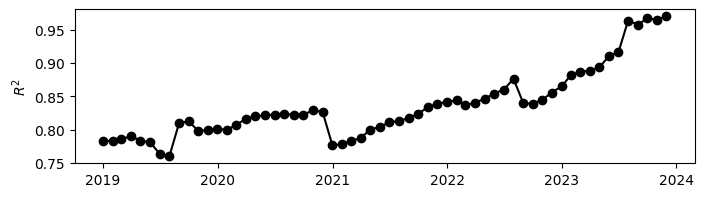

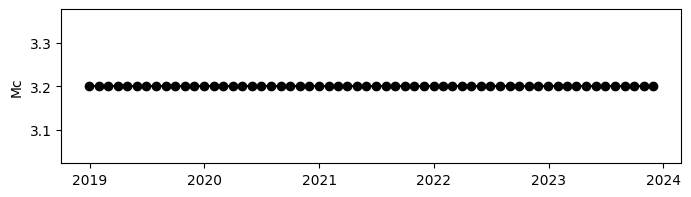

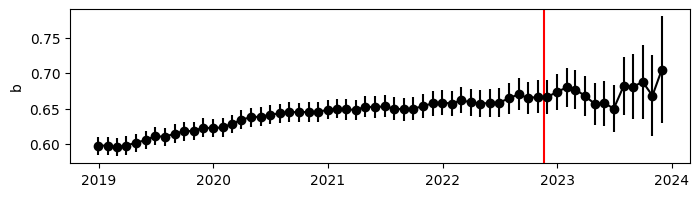

In [11]:
import datetime


fR = lambda obs, pred: 100 - np.sum(np.abs(obs - pred))*100/np.sum(obs)

mle_config = {'magnitude_interval': 0.1 ,
              'Average Type': 'Weighted',
              'reference_magnitude': None }

fN = lambda a, b, M: np.power(10, a - b*M)

Mc_all = []
b_all = []
sigma_b_all = []
R_all = []
R2_all = []
date_all = []
N_all = []
N_Mc_all = []
w = 3

m_c_range = np.r_[2.5:4.5:0.1] 

for yr in range(2019,2024):
    for mon in range(1,13):
        R_range = []
        m_c_tmp = None
        b_tmp = None
        sigma_b_tmp = None
        r2_tmp = None
        N_tmp = None
        N_Mc_tmp = None
        for m_c in [3.2]:
            try:
                cat = deepcopy(catalogue)
                cat.sort_catalogue_chronologically()
                flags = [datetime.date(y, m, d) for y, m, d in zip(cat["year"], cat["month"], cat["day"])]
                flags = [((d >= datetime.date(yr - w, mon, 1)) and (d < datetime.date(yr, mon, 1)))for d in flags]
                cat.purge_catalogue(flags)

                b_val, sigma_b, a_val, sigma_a = b_a_value(cat, mle_config, np.array([[yr - w, m_c]]))

                rec_table = extract_recurrence_table(cat, mle_config['magnitude_interval'])
                rec_table_mc = extract_recurrence_table_Mc(cat, mle_config['magnitude_interval'], 
                                                               m_c, yr - w)
            #     plt.figure(figsize=(6,5))

            #     plt.plot(rec_table[:-1,0], rec_table[:-1,3], "b+", label="incremental FMD")
            #     plt.plot(rec_table[:-1,0], rec_table[:-1,4], "r+", label="cumulative FMD")

            #     plt.plot(rec_table_mc[:-1,0], rec_table_mc[:-1,3], "bo", label="incremental FMD\n(limited by Mc)")
            #     plt.plot(rec_table_mc[:-1,0], rec_table_mc[:-1,4], "ro", label="cumulative FMD\n(limited by Mc)")

                N = fN(a_val, b_val, rec_table[:-1,0])
                N_Mc = fN(a_val, b_val, rec_table_mc[:-1,0])
                R = fR(rec_table_mc[:-1,4], N_Mc)
                r2 = r_squared(np.log10(rec_table_mc[:-1,4]), np.log10(N_Mc))

            #     plt.plot(rec_table[:-1,0], N, c='black', 
            #              label=f"$log(N) = a - bM$\nb = {b_val:.2f}\na = {a_val:.2f}\n"+ \
            #              f"$\sigma_b$ = {sigma_b:.2f}\n$\sigma_a$ = {sigma_a:.2f}\n$R$ = {R:.2f}"
            #             )

            #     plt.semilogy()
            #     plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', labelspacing = 1)

                if R_range == []:
                    R_range.append(R)
                    m_c_tmp = m_c
                    b_tmp = b_val
                    sigma_b_tmp = sigma_b
                    r2_tmp = r2
                    N_Mc_tmp = np.sum(rec_table_mc[:,1])
                    N_tmp = len(cat.data['year'])
                elif R >= R_range[-1]:
                    R_range.append(R)
                    m_c_tmp = m_c
                    b_tmp = b_val
                    sigma_b_tmp = sigma_b
                    r2_tmp = r2
                    N_Mc_tmp = np.sum(rec_table_mc[:,1])
                    N_tmp = len(cat.data['year'])
                else:
                    break

            except:
                break

        R_all.append(max(R_range))
        Mc_all.append(m_c_tmp)
        N_Mc_all.append(N_Mc_tmp)
        N_all.append(N_tmp)
        b_all.append(b_tmp)
        R2_all.append(r2_tmp)
        sigma_b_all.append(sigma_b_tmp)
        date_all.append(datetime.date(yr, mon, 1) - datetime.timedelta(days=1))

# plt.figure(figsize=(6,5))
# plt.plot(m_c_range[0:len(R_range)], R_range, 'ko-')
# plt.show()

plt.figure(figsize=(8,2))
plt.plot(date_all, N_all, 'ko-')
plt.axvline(datetime.date(2022, 11, 21), c='r')
plt.ylabel("N")
plt.figure(figsize=(8,2))
plt.plot(date_all, N_Mc_all, 'ko-')
plt.axvline(datetime.date(2022, 11, 21), c='r')
plt.ylabel("N (M > Mc)")
plt.figure(figsize=(8,2))
plt.plot(date_all, R_all, 'ko-')
plt.ylabel("R")
plt.figure(figsize=(8,2))
plt.plot(date_all, R2_all, 'ko-')
plt.ylabel("$R^2$")
plt.figure(figsize=(8,2))
plt.plot(date_all, Mc_all, 'ko-')
plt.ylabel("Mc")
plt.figure(figsize=(8,2))
plt.errorbar(date_all, b_all, yerr=sigma_b_all, marker='o', c='k')
# plt.axvline(datetime.date(2018, 2, 1), c='r')
plt.axvline(datetime.date(2022, 11, 21), c='r')
plt.ylabel("b")
plt.show()

# flags = (cat["year"] <= 2018) & (cat["month"] <= 2)
# cat.purge_catalogue(flags)
# print(np.array([cat["year"], cat["month"], cat["day"], cat["magnitude"]]).T)